In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", version = 1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
type(X)

pandas.core.frame.DataFrame

In [35]:
some_digit = X.iloc[0]
some_digit_arr = some_digit.to_numpy()
some_digit_image = some_digit_arr.reshape(28,28)

In [37]:
some_digit_arr

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

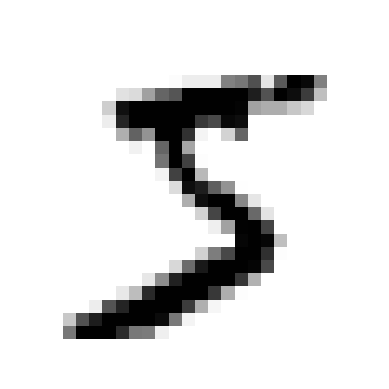

In [38]:
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [20]:
y[0]

'5'

In [21]:
type(y)

pandas.core.series.Series

In [23]:
import numpy as np

In [24]:
y = y.astype(np.uint8)

# Train - Test Split

In [25]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [57]:
type(X_train)

pandas.core.frame.DataFrame

In [26]:
y_train_5 = (y_train == 5)

In [28]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [29]:
y_test_5 = (y_test == 5)

# Stochastic Gradient Descent

In [31]:
from sklearn.linear_model import SGDClassifier

In [32]:
sgd_clf = SGDClassifier(random_state = 42)

In [33]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [43]:
sgd_clf.predict([some_digit])

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Implenting Cross Validation

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [46]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

In [50]:
skfolds.split(X_train, y_train_5)

<generator object _BaseKFold.split at 0x000001D547B60AE0>

In [54]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    print("Train index:", train_index)
    print("Size of train index:", np.size(train_index))
    print("Test Index:", test_index)
    print("Size of test index:", np.size(test_index))
    print("\n")

Train index: [    1     3     4 ... 59994 59996 59998]
Size of train index: 40000
Test Index: [    0     2     6 ... 59995 59997 59999]
Size of test index: 20000


Train index: [    0     2     3 ... 59997 59998 59999]
Size of train index: 40000
Test Index: [    1    10    11 ... 59988 59989 59991]
Size of test index: 20000


Train index: [    0     1     2 ... 59995 59997 59999]
Size of train index: 40000
Test Index: [    3     4     5 ... 59994 59996 59998]
Size of test index: 20000




In [58]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index,:]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index,:]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred)) 

0.9669
0.91625
0.96785


In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [61]:
from sklearn.base import BaseEstimator

In [62]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [63]:
never_5_clf = Never5Classifier()

In [64]:
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

# Confusion Matrix

In [65]:
from sklearn.model_selection import cross_val_predict

In [66]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [67]:
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [70]:
y_train_perfect_predictions = y_train_5

In [71]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

# Precision and Recall

In [72]:
from sklearn.metrics import precision_score, recall_score

In [73]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [74]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

# F1 Score

In [75]:
from sklearn.metrics import f1_score

In [76]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847